<a href="https://colab.research.google.com/github/navanil018/Loan_Predictor_Neural_Network/blob/master/Loan_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense

In [0]:
#Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
#drive.mount('/content/drive')

#!ls "/content/drive/"
loc = "/content/sample_data/bankloan.csv"

df = pd.read_csv(loc)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
df.columns
df = df.dropna()
#df = df.drop('Loan_ID', axis=1)
df['LoanAmount'] = (df['LoanAmount']*1000).astype(int)

In [0]:
Counter(df['Loan_Status'])

Counter({'N': 148, 'Y': 332})

In [0]:
pre_y = df['Loan_Status']
pre_X = df.drop('Loan_Status', axis = 1)

In [0]:
dm_X = pd.get_dummies(pre_X)
dm_y = pre_y.map(dict(Y=1, N=0))
dm_y

1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
12     1
13     0
14     1
15     1
17     0
18     0
20     0
21     1
22     0
25     1
26     1
27     1
28     0
31     0
32     0
33     1
34     0
37     1
38     1
39     1
      ..
575    1
577    1
578    1
580    1
581    0
582    1
584    0
585    0
586    1
587    1
589    0
590    1
591    0
593    1
594    1
595    1
596    0
598    1
599    1
602    1
603    1
604    1
606    1
607    1
608    1
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [0]:
smote = SMOTE(ratio='minority')
X1, y = smote.fit_sample(dm_X, dm_y)
sc = MinMaxScaler()
X = sc.fit_transform(X1)

In [0]:
Counter(y)

Counter({0: 332, 1: 332})

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

Neural Network

In [0]:
classifier = Sequential()
classifier.add(Dense(200, activation = 'relu', kernel_initializer='random_normal', input_dim=X_test.shape[1]))
classifier.add(Dense(400, activation = 'relu', kernel_initializer='random_normal'))
classifier.add(Dense(2, activation = 'relu', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation = 'sigmoid', kernel_initializer='random_normal'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 0)
eval_model = classifier.evaluate(X_train, y_train)
eval_model






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

531/531 [==============================] - 0s 96us/step


[2.0969560895444652e-05, 1.0]

In [0]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.55)

[Text(0.5, 0, 'No'), Text(1.5, 0, 'Yes')]

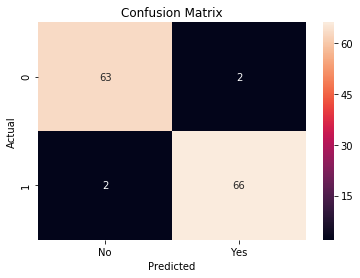

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.xaxis.set_ticklabels(['No', 'Yes'])

In [0]:
import pickle
from sklearn.externals import joblib
filename = 'loan_model.pkl'
joblib.dump(classifier, filename)

['loan_model.pkl']